In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sb

from warnings import filterwarnings
filterwarnings('ignore')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
from sklearn.model_selection import cross_val_score

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
df = pd.read_csv('train.csv')
df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

In [5]:
df.shape

(74111, 29)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,74111.0,1.126662e+07,6.081735e+06,344.000000,6.261964e+06,1.225415e+07,1.640226e+07,2.123090e+07
log_price,74111.0,4.782069e+00,7.173938e-01,0.000000,4.317488e+00,4.709530e+00,5.220356e+00,7.600402e+00
accommodates,74111.0,3.155146e+00,2.153589e+00,1.000000,2.000000e+00,2.000000e+00,4.000000e+00,1.600000e+01
bathrooms,73911.0,1.235263e+00,5.820441e-01,0.000000,1.000000e+00,1.000000e+00,1.000000e+00,8.000000e+00
latitude,74111.0,3.844596e+01,3.080167e+00,33.338905,3.412791e+01,4.066214e+01,4.074610e+01,4.239044e+01
longitude,74111.0,-9.239753e+01,2.170532e+01,-122.511500,-1.183424e+02,-7.699696e+01,-7.395466e+01,-7.098505e+01
number_of_reviews,74111.0,2.090057e+01,3.782864e+01,0.000000,1.000000e+00,6.000000e+00,2.300000e+01,6.050000e+02
review_scores_rating,57389.0,9.406736e+01,7.836556e+00,20.000000,9.200000e+01,9.600000e+01,1.000000e+02,1.000000e+02
bedrooms,74020.0,1.265793e+00,8.521435e-01,0.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+01
beds,73980.0,1.710868e+00,1.254142e+00,0.000000,1.000000e+00,1.000000e+00,2.000000e+00,1.800000e+01


In [7]:
df.nunique()

id                        74111
log_price                   767
property_type                35
room_type                     3
amenities                 67122
accommodates                 16
bathrooms                    17
bed_type                      5
cancellation_policy           5
cleaning_fee                  2
city                          6
description               73479
first_review               2554
host_has_profile_pic          2
host_identity_verified        2
host_response_rate           80
host_since                 3087
instant_bookable              2
last_review                1371
latitude                  74111
longitude                 74111
name                      73359
neighbourhood               619
number_of_reviews           371
review_scores_rating         54
thumbnail_url             65883
zipcode                     769
bedrooms                     11
beds                         18
dtype: int64

In [11]:
df.dtypes

id                          int64
log_price                 float64
property_type              object
room_type                  object
amenities                  object
accommodates                int64
bathrooms                 float64
bed_type                   object
cancellation_policy        object
cleaning_fee                 bool
city                       object
description                object
first_review               object
host_has_profile_pic       object
host_identity_verified     object
host_response_rate         object
host_since                 object
instant_bookable           object
last_review                object
latitude                  float64
longitude                 float64
name                       object
neighbourhood              object
number_of_reviews           int64
review_scores_rating      float64
thumbnail_url              object
zipcode                    object
bedrooms                  float64
beds                      float64
dtype: object

In [43]:
df.isnull().sum()

id                             0
log_price                      0
property_type                  0
room_type                      0
amenities                      0
accommodates                   0
bathrooms                    200
bed_type                       0
cancellation_policy            0
cleaning_fee                   0
city                           0
description                    0
first_review                   0
host_has_profile_pic         188
host_identity_verified       188
host_response_rate         18299
host_since                   188
instant_bookable               0
last_review                    0
latitude                       0
longitude                      0
name                           0
neighbourhood               6872
number_of_reviews              0
review_scores_rating       16722
thumbnail_url               8216
zipcode                      966
bedrooms                      91
beds                         131
time_since_first_review    15864
dtype: int

In [12]:
missing_percentage = df.isnull().mean() * 100
# Filter columns with missing values
columns_with_missing_values = missing_percentage[missing_percentage > 0]
# Print the columns with missing values and their percentages
for column, percentage in columns_with_missing_values.items():
    print(f"{column}' : {percentage:.2f}%")

bathrooms' : 0.27%
first_review' : 21.41%
host_has_profile_pic' : 0.25%
host_identity_verified' : 0.25%
host_response_rate' : 24.69%
host_since' : 0.25%
last_review' : 21.36%
neighbourhood' : 9.27%
review_scores_rating' : 22.56%
thumbnail_url' : 11.09%
zipcode' : 1.30%
bedrooms' : 0.12%
beds' : 0.18%


In [13]:
duplicates = df.duplicated(keep=False)
print(df[duplicates])

Empty DataFrame
Columns: [id, log_price, property_type, room_type, amenities, accommodates, bathrooms, bed_type, cancellation_policy, cleaning_fee, city, description, first_review, host_has_profile_pic, host_identity_verified, host_response_rate, host_since, instant_bookable, last_review, latitude, longitude, name, neighbourhood, number_of_reviews, review_scores_rating, thumbnail_url, zipcode, bedrooms, beds]
Index: []

[0 rows x 29 columns]


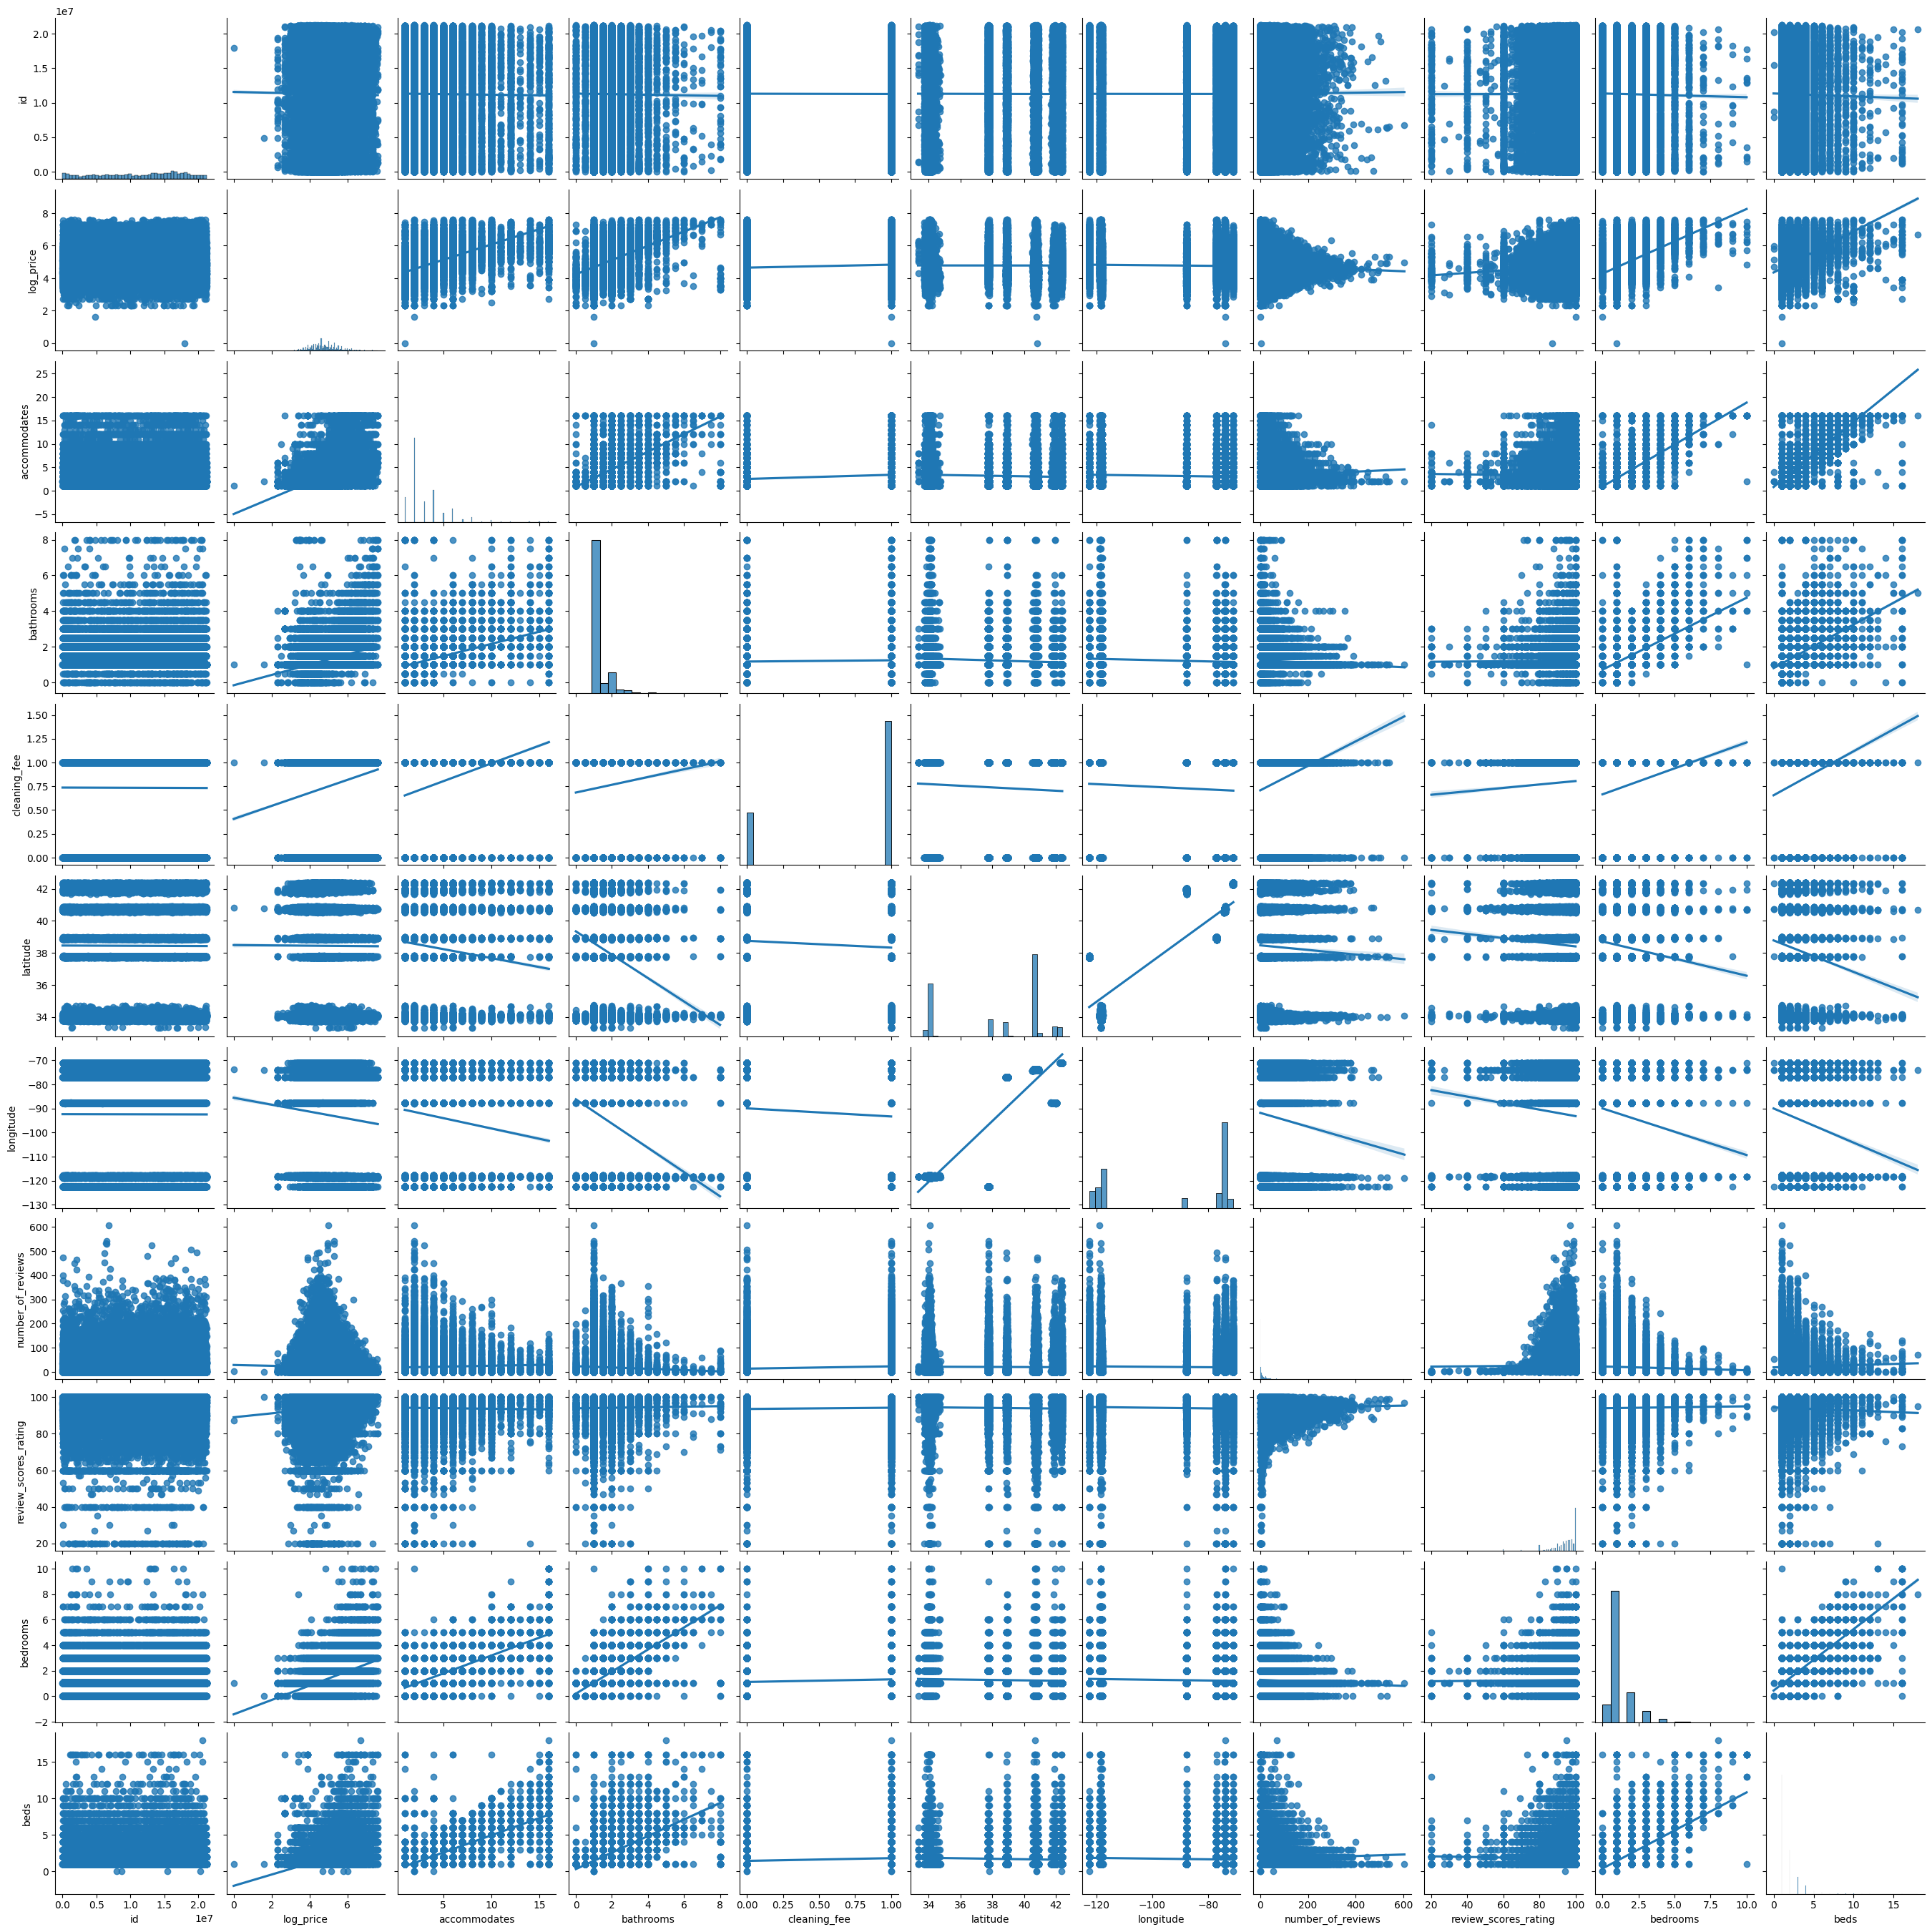

In [14]:
#We created a pair of scatterplots that are used to visualize 
  #the relationship of variables in the DataFrame to each other.
import seaborn as sns
sns.pairplot(df, kind  ="reg");

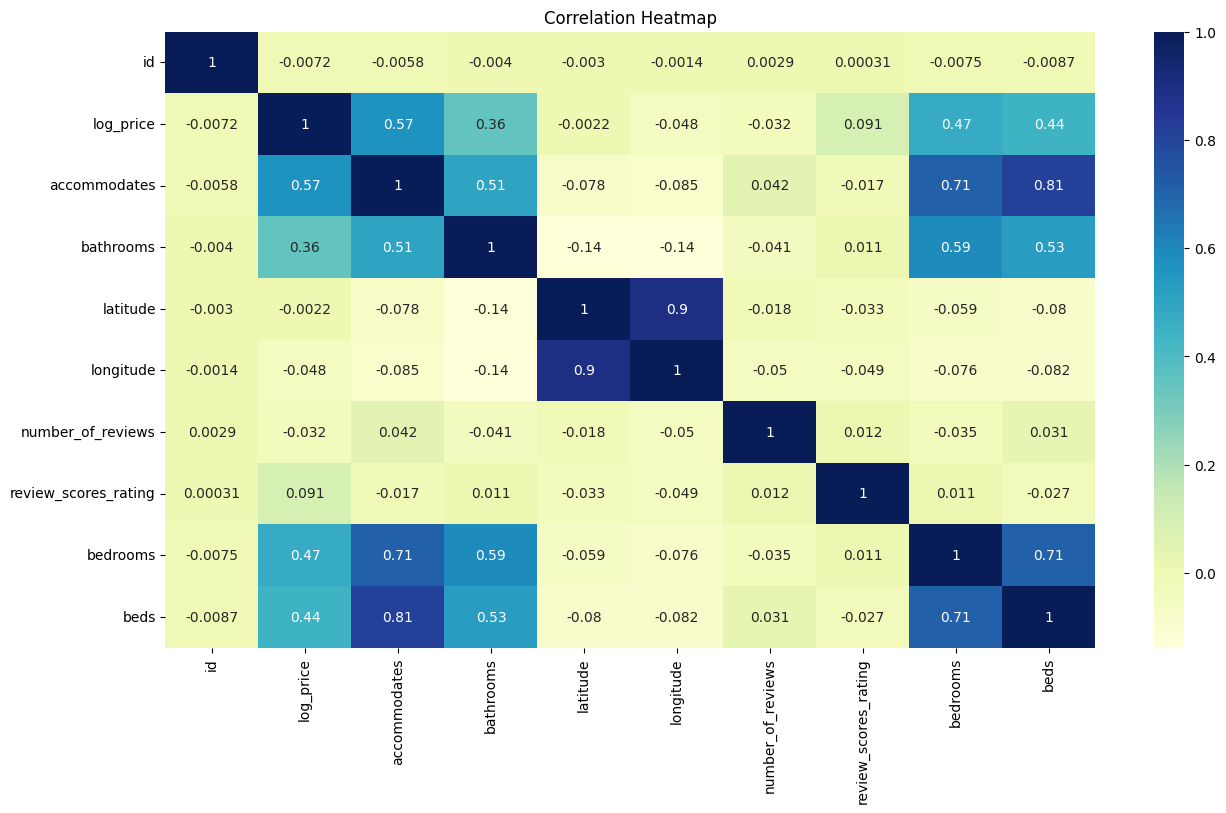

In [18]:
#we check correlation
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

numeric_columns = df.select_dtypes(include=np.number).columns
numeric_df = df[numeric_columns]
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(15, 8))
dataplot = sns.heatmap(correlation_matrix, cmap="YlGnBu", annot=True)
plt.title("Correlation Heatmap")
plt.show()


In [22]:
#we check the correlation between our target variable and other columns
numeric_columns = df.select_dtypes(include=np.number).columns
target_correlation = df[numeric_columns].corr()['log_price'].abs().sort_values(ascending=False)
target_correlation

log_price               1.000000
accommodates            0.567574
bedrooms                0.473212
beds                    0.442153
bathrooms               0.355420
review_scores_rating    0.091219
longitude               0.047529
number_of_reviews       0.032470
id                      0.007178
latitude                0.002193
Name: log_price, dtype: float64

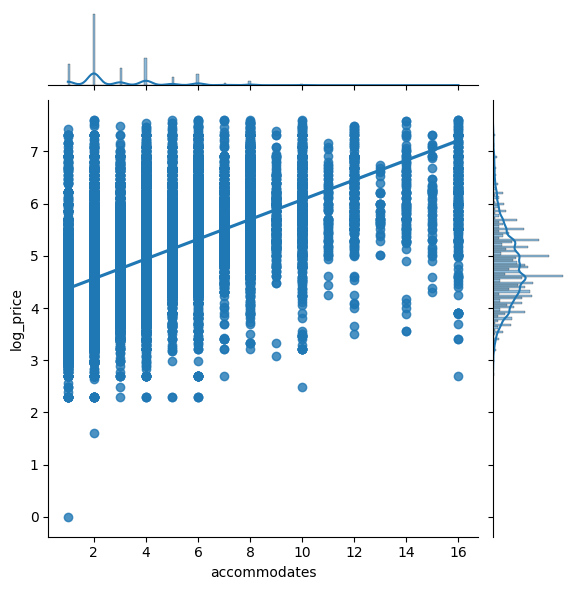

In [23]:
import seaborn as sns
sns.jointplot(x = "accommodates", y = "log_price", data = df, kind = "reg")

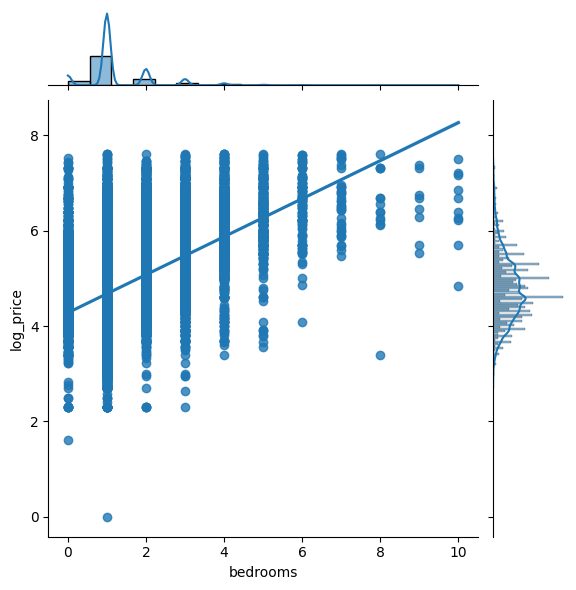

In [27]:
sns.jointplot(x = "bedrooms", y = "log_price", data = df, kind = "reg")

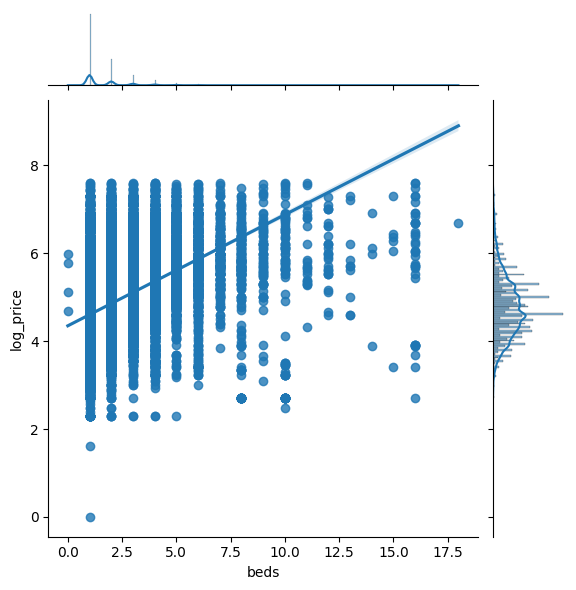

In [25]:
sns.jointplot(x = "beds", y = "log_price", data = df, kind = "reg")

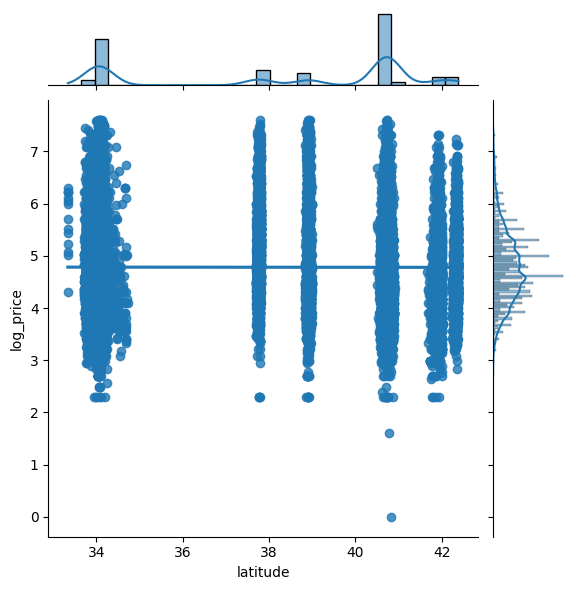

In [28]:
sns.jointplot(x = "latitude", y = "log_price", data = df, kind = "reg")

### Handling Missing Values

In [29]:
df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


#### city

In [61]:
df['city']

0        NYC
1        NYC
2        NYC
3         SF
4         DC
        ... 
74106    NYC
74107     LA
74108    NYC
74109    NYC
74110     LA
Name: city, Length: 74111, dtype: object

In [6]:
df['city'].isnull().sum()

0

### description

In [62]:
df['description']

0        Beautiful, sunlit brownstone 1-bedroom in the ...
1        Enjoy travelling during your stay in Manhattan...
2        The Oasis comes complete with a full backyard ...
3        This light-filled home-away-from-home is super...
4        Cool, cozy, and comfortable studio located in ...
                               ...                        
74106                            one room in bushwick apt 
74107    Located on the Pacific Coast Highway, this apa...
74108    A modern apartment located in East Williamsbur...
74109    Fully renovated, designer's studio located in ...
74110    You will stay-aboard the Island Trader at one ...
Name: description, Length: 74111, dtype: object

In [7]:
df['description'].isnull().sum()

0

### first_review-last_review

In [3]:
df['first_review'].isnull().sum()

15864

In [32]:
df['first_review']

0       2016-06-18
1       2017-08-05
2       2017-04-30
3              NaT
4       2015-05-12
           ...    
74106          NaT
74107   2016-08-15
74108   2015-01-03
74109          NaT
74110   2013-09-05
Name: first_review, Length: 74111, dtype: datetime64[ns]

In [64]:
df['last_review'].isnull().sum()

0

In [35]:
df['last_review']

0        2016-07-18
1        2017-09-23
2        2017-09-14
3               NaN
4        2017-01-22
            ...    
74106           NaN
74107    2017-04-15
74108    2017-09-10
74109           NaN
74110    2017-04-30
Name: last_review, Length: 74111, dtype: object

In [4]:
 # Converting to datetime
df.first_review = pd.to_datetime(df.first_review)
df.last_review = pd.to_datetime(df.last_review)

In [5]:
df['first_review'].dtype

dtype('<M8[ns]')

In [4]:
#We calculated the percentage of blank values in the first_review and review_scores_rating columns
print(f"Null values in 'first_review': {round(100*df.first_review.isna().sum()/len(df),1)}%")
print(f"Null values in 'last_review': {round(100*df.last_review.isna().sum()/len(df),1)}%")
print(f"Null values in 'review_scores_rating': {round(100*df.review_scores_rating .isna().sum()/len(df),1)}%")

Null values in 'first_review': 21.4%
Null values in 'last_review': 21.4%
Null values in 'review_scores_rating': 22.6%


In [34]:
#We checked for the same null values in the first_review,last_review and review_scores_rating columns
first_review_column = df['first_review']
last_review_column = df['last_review']
review_scores_rating_column = df['review_scores_rating']

nan_in_first_review = first_review_column.isna()
nan_in_last_review = last_review_column.isna()
nan_in_review_scores_rating = review_scores_rating_column.isna()

nan_match = nan_in_first_review.all() == nan_in_first_review.all() == nan_in_review_scores_rating.all()

nan_match

True

About one-fifth of listings do not have a review written for them. This is an unnecessarily large proportion of the dataset, and dropping columns loses a lot of useful information - reviews are crucial in people's decision to book, and therefore price.

This is also a dataset ratio that is too large to simply replace with median/mean values, as it will drastically skew the distribution. Also, the missing values here aren't really the missing values, because it makes sense that they're NaNs - it tells us that these are new or unbooked and not yet reviewed lists. To make the resulting model work in such a way that it can predict the prices of any Airbnb listing, including brand new listings, it's actually useful to keep them in. Therefore, we will replace them with 00-00-00

In [6]:
#handeling missing value
df['first_review'] = df['first_review'].fillna('0000-00-00')
df['last_review'] = df['last_review'].fillna('0000-00-00')

In [7]:
print(f"Null values in 'first_review': {df['first_review'].isnull().sum()}")
print(f"Null values in 'last_review': {df['last_review'].isnull().sum()}")

Null values in 'first_review': 0
Null values in 'last_review': 0


In [8]:
df['first_review'].dtype

dtype('O')

In [9]:
df['first_review'] = pd.to_numeric(df['first_review'], errors='coerce')

In [10]:
df['first_review'].dtype

dtype('float64')

### host_has_profile_pic - host_identity_verified - host_since

In [42]:
df['host_has_profile_pic'].isnull().sum()


188

In [45]:
df['host_identity_verified'].isnull().sum()

188

In [11]:
df['host_since'].isnull().sum()

188

In [12]:
#We check the nan values

print(f"Null values in 'host_has_profile_pic': {df['host_has_profile_pic'].isnull().sum()}")
print(f"Null values in 'host_identity_verified': {df['host_identity_verified'].isnull().sum()}")
print(f"Null values in 'host_since': {df['host_since'].isnull().sum()}")

Null values in 'host_has_profile_pic': 188
Null values in 'host_identity_verified': 188
Null values in 'host_since': 188


In [46]:
#We calculated the percentage of blank values in the host_has_profile_pic and host_identity_verified columns

print(f"Null values in 'host_has_profile_pic': {round(100*df.host_has_profile_pic.isna().sum()/len(df),1)}%")
print(f"Null values in 'host_identity_verified': {round(100*df.host_identity_verified.isna().sum()/len(df),1)}%")
print(f"Null values in 'host_since': {round(100*df.host_since.isna().sum()/len(df),1)}%")

Null values in 'host_has_profile_pic': 0.3%
Null values in 'host_identity_verified': 0.3%


In [13]:
#We checked for the same null values in the host_has_profile_pic and host_identity_verified columns

nan_in_profile = df['host_has_profile_pic'].isna()
nan_in_id = df['host_identity_verified'].isna()
nan_in_host_since = df['host_since'].isna()

nan_match1 = nan_in_profile.all() == nan_in_id.all() == nan_in_host_since.all()

nan_match1

True

In [48]:
#We made the true ones 1 the false ones 0 and filled the nan values with 0

df.loc[df.host_has_profile_pic == 't', 'host_has_profile_pic'] = 1
df.loc[df.host_has_profile_pic == 'f', 'host_has_profile_pic'] = 0
df['host_has_profile_pic'] = df['host_has_profile_pic'].fillna(0)
df.loc[df.host_identity_verified == 't', 'host_identity_verified'] = 1
df.loc[df.host_identity_verified == 'f', 'host_identity_verified'] = 0
df['host_identity_verified'] = df['host_identity_verified'].fillna(0)
df['host_since'].fillna(df['host_since'].median(), inplace=True)

In [14]:
df['host_since'] = pd.to_datetime(df['host_since'], errors='coerce')

In [49]:
print(f"Null values in 'host_has_profile_pic': {df['host_has_profile_pic'].isnull().sum()}")
print(f"Null values in 'host_identity_verified': {df['host_identity_verified'].isnull().sum()}")
print(f"Null values in 'host_since': {df['host_since'].isnull().sum()}")

Null values in 'host_has_profile_pic': 0
Null values in 'host_identity_verified': 0


### host_response_rate

In [53]:
df['host_response_rate']

0         NaN
1        100%
2        100%
3         NaN
4        100%
         ... 
74106     NaN
74107    100%
74108    100%
74109    100%
74110    100%
Name: host_response_rate, Length: 74111, dtype: object

In [54]:
# Removing the % sign from the host_response_rate string and converting to an integer
df.host_response_rate = df.host_response_rate.str[:-1].astype('float64')
df['host_response_rate']

0          NaN
1        100.0
2        100.0
3          NaN
4        100.0
         ...  
74106      NaN
74107    100.0
74108    100.0
74109    100.0
74110    100.0
Name: host_response_rate, Length: 74111, dtype: float64

In [52]:
#We calculated the percentage of blank values in the host_response_rate 
print(f"Null values in 'host_response_rate': {round(100*df.host_response_rate.isna().sum()/len(df),1)}%")

Null values in 'host_response_rate': 24.7%


In [57]:
print("Mean host response rate:", round(df['host_response_rate'].mean(),0))
print("Median host response rate:", df['host_response_rate'].median())
print(f"Proportion of 100% host response rates: {round(((df.host_response_rate == 100.0).sum()/df.host_response_rate.count())*100,1)}%")

Mean host response rate: 94.0
Median host response rate: 100.0
Proportion of 100% host response rates: 77.5%


In [58]:
# Bin into four categories
df.host_response_rate = pd.cut(df.host_response_rate, bins=[0, 50, 90, 99, 100], labels=['0-49%', '50-89%', '90-99%', '100%'], include_lowest=True)

# Converting to string
df.host_response_rate = df.host_response_rate.astype('str')

# Replace nulls with 'unknown'
df.host_response_rate.replace('nan', 'unknown', inplace=True)

# Category counts
df.host_response_rate.value_counts()

host_response_rate
100%       43254
unknown    18299
50-89%      7291
90-99%      3192
0-49%       2075
Name: count, dtype: int64

### instant_bookable

In [15]:
df['instant_bookable']

0        f
1        t
2        t
3        f
4        t
        ..
74106    f
74107    f
74108    t
74109    t
74110    f
Name: instant_bookable, Length: 74111, dtype: object

In [16]:
df['instant_bookable'].isnull().sum()

0

In [17]:
#We made the true ones 1 the false ones 0 
df.loc[df.instant_bookable == 't', 'instant_bookable'] = 1
df.loc[df.instant_bookable == 'f', 'instant_bookable'] = 0